<h1>Table of Contents<span class="tocSkip"></span></h1>
<div class="toc"><ul class="toc-item"><li><span><a href="#Import-modules" data-toc-modified-id="Import-modules-1"><span class="toc-item-num">1&nbsp;&nbsp;</span>Import modules</a></span></li><li><span><a href="#Read-in-data,-clean-HTML-and-non-alpha-numerics" data-toc-modified-id="Read-in-data,-clean-HTML-and-non-alpha-numerics-2"><span class="toc-item-num">2&nbsp;&nbsp;</span>Read in data, clean HTML and non-alpha numerics</a></span></li><li><span><a href="#Get-list-of-filenames" data-toc-modified-id="Get-list-of-filenames-3"><span class="toc-item-num">3&nbsp;&nbsp;</span>Get list of filenames</a></span></li><li><span><a href="#Check-%-empty-rows,-duplicates-etc" data-toc-modified-id="Check-%-empty-rows,-duplicates-etc-4"><span class="toc-item-num">4&nbsp;&nbsp;</span>Check % empty rows, duplicates etc</a></span></li><li><span><a href="#Remove-nan-rows-for-certain-language" data-toc-modified-id="Remove-nan-rows-for-certain-language-5"><span class="toc-item-num">5&nbsp;&nbsp;</span>Remove nan rows for certain language</a></span></li><li><span><a href="#Split-each-row-into-individual-words,-and-put-into-datafrane" data-toc-modified-id="Split-each-row-into-individual-words,-and-put-into-datafrane-6"><span class="toc-item-num">6&nbsp;&nbsp;</span>Split each row into individual words, and put into datafrane</a></span></li><li><span><a href="#Create-word-counts-dataframe,-rename-columns,-remove-alphabet" data-toc-modified-id="Create-word-counts-dataframe,-rename-columns,-remove-alphabet-7"><span class="toc-item-num">7&nbsp;&nbsp;</span>Create word counts dataframe, rename columns, remove alphabet</a></span></li><li><span><a href="#Check-if-each-word-in-stopwords-list,-and-add-boolean-to-dataframe" data-toc-modified-id="Check-if-each-word-in-stopwords-list,-and-add-boolean-to-dataframe-8"><span class="toc-item-num">8&nbsp;&nbsp;</span>Check if each word in stopwords list, and add boolean to dataframe</a></span></li><li><span><a href="#Calculate-T-IDF" data-toc-modified-id="Calculate-T-IDF-9"><span class="toc-item-num">9&nbsp;&nbsp;</span>Calculate T-IDF</a></span></li><li><span><a href="#Plot-True-vs-False" data-toc-modified-id="Plot-True-vs-False-10"><span class="toc-item-num">10&nbsp;&nbsp;</span>Plot True vs False</a></span></li><li><span><a href="#Attach-row-count-for-each-word" data-toc-modified-id="Attach-row-count-for-each-word-11"><span class="toc-item-num">11&nbsp;&nbsp;</span>Attach row count for each word</a></span></li><li><span><a href="#Reload-in-results,-if-saved-previously" data-toc-modified-id="Reload-in-results,-if-saved-previously-12"><span class="toc-item-num">12&nbsp;&nbsp;</span>Reload in results, if saved previously</a></span></li></ul></div>

# Import modules

In [1]:
import pandas as pd
import nltk 
import numpy as np
nltk.download("words")
nltk.download("stopwords")
nltk.download("brown")
nltk.download("wordnet")
from nltk.corpus import words
from nltk.corpus import stopwords
from nltk.corpus import brown
from nltk.corpus import wordnet
from nltk.stem.wordnet import WordNetLemmatizer
import re
from pathlib import Path
import matplotlib.pyplot as plt
from sklearn.feature_extraction.text import TfidfTransformer
from sklearn.feature_extraction.text import CountVectorizer
import os
from pylab import rcParams

[nltk_data] Downloading package words to
[nltk_data]     C:\Users\Shaheen.Ahmed\AppData\Roaming\nltk_data...
[nltk_data]   Package words is already up-to-date!
[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\Shaheen.Ahmed\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package brown to
[nltk_data]     C:\Users\Shaheen.Ahmed\AppData\Roaming\nltk_data...
[nltk_data]   Package brown is already up-to-date!
[nltk_data] Downloading package wordnet to
[nltk_data]     C:\Users\Shaheen.Ahmed\AppData\Roaming\nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


# Read in data, clean HTML and non-alpha numerics

In [2]:
def read_file(filename):
    df = pd.read_csv(filename, index_col = 0, encoding = 'utf-8')
    df = df.applymap(str)
    df = df.apply(lambda col: col.str.lower())
    df = df.replace('<[^<]+?>', ' ',regex=True).astype(str) #Remove all strings, bounded by < and > 
    df = df.replace(r"[^a-zA-Z]+", " ",regex=True).astype(str) #Remove all non alpha-numerics
    return df

# Get list of filenames

In [3]:
def get_all_descriptions_from_folder(root_dir):
    
    arr = os.listdir(root_dir)
    print (arr)
    df_all_descriptions = pd.DataFrame()

    for i in arr:
        filename = os.path.join(root_dir, i)
        df_file = read_file(filename)
        df_file = df_file.rename(columns={"Long description (English)": "English", 
                                "Long description (Dutch)": "Dutch", 
                                "Long description (French)": "French",
                                "Long description (German)": "German"})

        df_all_descriptions = pd.concat([df_all_descriptions, df_file], ignore_index = True)
    return df_all_descriptions

# Check % empty rows, duplicates etc

In [4]:
def check_percentage_empty_rows(df, row_name, nan_identifier):
    perc_empty = ( len(df[df[row_name] == nan_identifier]) / len(df) )
    print ("%s, Percentage empty rows = %s " % (row_name, perc_empty))

# Remove nan rows for certain language

In [5]:
def remove_nans_for_language(df, language, nan_identifier):
    df_trimmed = df[~df[language].str.contains(nan_identifier)]
    print ("Previous length of df: %s " % len(df))
    print ("New length of df: %s " % len(df_trimmed))
    return df_trimmed

# Split each row into individual words, and put into datafrane

In [6]:
def Get_list_top_n_words(df, language, n_words):
    list_top_n_words = df[language].str.split(expand=True).stack().value_counts().head(n_words).index.to_list()
    print (list_top_n_words)
    return list_top_n_words

def Plot_top_n_words(df, language, n_words):
    df[language].str.split(expand=True).stack().value_counts().head(n_words).plot('bar')

# Create word counts dataframe, rename columns, remove alphabet

In [7]:
def create_df_word_counts(language, df_descriptions):
    df_word_counts = df_descriptions[language].str.split(expand=True).stack().value_counts().reset_index(name='count')
    df_word_counts.columns = ['word', 'count']
    df_word_counts = df_word_counts[df_word_counts['word'].str.len() > 1]

    return df_word_counts

# Check if each word in stopwords list, and add boolean to dataframe

In [8]:
def add_in_nltk_bool(df_word_counts, language):
    
    stopword_list = stopwords.words(language)
    stopword_set = set(stopword_list)

    for i, row in df_word_counts.iterrows():
        word = row['word']
        if word in stopword_set:
            df_word_counts.loc[i, 'in_nltk_stopwords_bool'] = True
        else:
            df_word_counts.loc[i, 'in_nltk_stopwords_bool'] = False
    
    return df_word_counts

In [9]:
def apply_colour(df_word_counts):

    def color(val):
        if val == True:
            color = 'green'
        else:
            color = 'red'
        return 'background-color: %s' % color
    
    df_word_counts = df_word_counts.style.applymap(color, subset=['in_nltk_stopwords_bool'])
    return df_word_counts

# Calculate T-IDF

In [10]:
def add_idf_scores(df_word_counts, df_descriptions, language):
    
    #instantiate CountVectorizer()
    cv=CountVectorizer()

    # this steps generates word counts for the words in each description
    word_count_vector=cv.fit_transform(df_descriptions[language].to_list())
    
    tfidf_transformer=TfidfTransformer(smooth_idf=True,use_idf=True)
    tfidf_transformer.fit(word_count_vector)
    
    # print idf values
    df_idf = pd.DataFrame()
    df_idf['word'], df_idf['idf_score'] = [cv.get_feature_names(), tfidf_transformer.idf_]

    #Left join idf df and df_word_counts
    df_word_counts = pd.merge(df_word_counts, df_idf, on='word', how = 'left')

    return df_word_counts

# Plot True vs False 

In [11]:
def output_plots(df_word_counts):
    
    rcParams['figure.figsize'] = 10,10
    plt.figure()
    plt.scatter(
    df_word_counts.loc[df_word_counts['in_nltk_stopwords_bool'] == True]['count'], 
    df_word_counts.loc[df_word_counts['in_nltk_stopwords_bool'] == True]['idf_score'], 
    c='green', alpha=.5) 
    
    plt.figure()
    plt.scatter(
    df_word_counts.loc[df_word_counts['in_nltk_stopwords_bool'] == False]['count'], 
    df_word_counts.loc[df_word_counts['in_nltk_stopwords_bool'] == False]['idf_score'], 
    c='red', alpha=.5)
    
    return df_word_counts

# Attach row count for each word

In [12]:
# Initial method, much slower
'''
df_all_descriptions_nan_removed_copy['English'] = df_all_descriptions_nan_removed_copy['English'].str.split()
df_word_counts_idf_merged["row_count"] = np.nan 

for i, row_words_df in df_word_counts_idf_merged.iterrows():
    if i % 5 == 0:  
        print (i)
    count = 0
    for j, row_descriptions_df in df_all_descriptions_nan_removed_copy.iterrows():
        if row_words_df['word'] in row_descriptions_df['English']:
            count += 1
    df_word_counts_idf_merged.at[i, "row_count"] = count        
'''

'\ndf_all_descriptions_nan_removed_copy[\'English\'] = df_all_descriptions_nan_removed_copy[\'English\'].str.split()\ndf_word_counts_idf_merged["row_count"] = np.nan \n\nfor i, row_words_df in df_word_counts_idf_merged.iterrows():\n    if i % 5 == 0:  \n        print (i)\n    count = 0\n    for j, row_descriptions_df in df_all_descriptions_nan_removed_copy.iterrows():\n        if row_words_df[\'word\'] in row_descriptions_df[\'English\']:\n            count += 1\n    df_word_counts_idf_merged.at[i, "row_count"] = count        \n'

In [13]:
#Second method, faster

def calc_row_count_each_word(df_word_counts, df_descriptions, language):
    
    df_word_counts["row_count"] = np.nan 

    for i, row_words_df in df_word_counts.iterrows():
        if i % 500 == 0:  
            print ("row processed in calc_row_count_each_word: %s" % (i))
        word = row_words_df['word']
        df_1 = df_descriptions[df_descriptions[language].str.contains(" " + word + " ")]
        df_2 = df_descriptions[df_descriptions[language].str.contains(" " + word)]
        df_3 = df_descriptions[df_descriptions[language].str.contains(word + " ")]
        df_matches = pd.concat([df_1, df_2, df_3]).drop_duplicates().reset_index(drop=True)
        df_word_counts.at[i, "row_count"] = len(df_matches)
        
    df_word_counts['counts_row_count'] = df_word_counts['count'] / df_word_counts['row_count']
    return df_word_counts

In [14]:
def plot_idf_count_comparisons(df_word_counts, color):    
    df_word_counts['idf'] = df_word_counts['idf_score'] / df_word_counts['count']
    df_true = df_word_counts[df_word_counts['in_nltk_stopwords_bool'] == True]
    df_false = df_word_counts[df_word_counts['in_nltk_stopwords_bool'] == False]
    df_false['idf_score'] = pd.to_numeric(df_false['idf_score'])
    plt.figure()
    df_true.plot.scatter(x = 'idf_score', y = 'counts_row_count', color = color)
    plt.figure()
    df_false.plot.scatter(x = 'idf_score', y = 'counts_row_count', s = 0.5, color = color)
    plt.figure()
    df_true.plot.scatter(x = 'idf_score', y = 'row_count', color = color)
    plt.figure()
    df_false.plot.scatter(x = 'idf_score', y = 'row_count', color = color)
    plt.figure()
    df_true.plot.scatter(x = 'idf_score', y = 'count', color = color)
    plt.figure()
    df_false.plot.scatter(x = 'idf_score', y = 'count', color = color)
    df_false.describe()
    
    return (df_true, df_false)

In [15]:
def output_stopword_lists(df, idf_threshold):
    list_stopwords = df[df['idf_score'] <= idf_threshold].word.unique()
    print (list_stopwords)
    print ("number of stopwords = %s" % (len(list_stopwords)))
    return list_stopwords

In [16]:
def save_df(df, filename):
    
    df.to_csv(filename, sep=',')

['Bearings.csv', 'Compensators.csv', 'Electical_components.csv', 'Fastners.csv', 'Filteration.csv', 'Gearboxes_motors_drives.csv', 'Hoses_Couplings_indus.csv', 'Hydraulics.csv', 'Insulation_materials.csv', 'Lifting_hoisting.csv', 'Lubricants_equipment.csv', 'Machines.csv', 'Maintenance_products.csv', 'Measurement_control.csv', 'Mech_power_transmission.csv', 'Mounting_systems.csv', 'Piping.csv', 'Piping_plastics.csv', 'Pneumatic_components.csv', 'Precision_control.csv', 'Process_pumps.csv', 'Rubber_products.csv', 'Safety.csv', 'Sealing_equipment.csv', 'Spill_control.csv', 'Synthetic_materials.csv', 'Tools.csv', 'Valves.csv', 'Vibration_dampers.csv', 'Welding_equipment.csv', 'Workplace_equipment.csv']


C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:28: DtypeWarning: Columns (2,4,5) have mixed types. Specify dtype option on import or set low_memory=False.
C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:28: DtypeWarning: Columns (3,4,5) have mixed types. Specify dtype option on import or set low_memory=False.
C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:28: DtypeWarning: Columns (2,3,4) have mixed types. Specify dtype option on import or set low_memory=False.


English, Percentage empty rows = 0.8377330316827177 
Previous length of df: 1595223 
New length of df: 249223 
row processed in calc_row_count_each_word: 0
row processed in calc_row_count_each_word: 500
row processed in calc_row_count_each_word: 1000
row processed in calc_row_count_each_word: 1500
row processed in calc_row_count_each_word: 2000
row processed in calc_row_count_each_word: 2500
row processed in calc_row_count_each_word: 3000
row processed in calc_row_count_each_word: 3500
row processed in calc_row_count_each_word: 4000
row processed in calc_row_count_each_word: 4500
row processed in calc_row_count_each_word: 5000
row processed in calc_row_count_each_word: 5500
row processed in calc_row_count_each_word: 6000
row processed in calc_row_count_each_word: 6500
row processed in calc_row_count_each_word: 7000
row processed in calc_row_count_each_word: 7500
row processed in calc_row_count_each_word: 8000
row processed in calc_row_count_each_word: 8500
row processed in calc_row_cou

KeyboardInterrupt: 

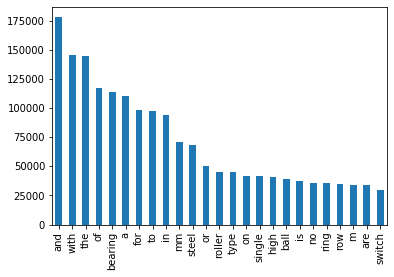

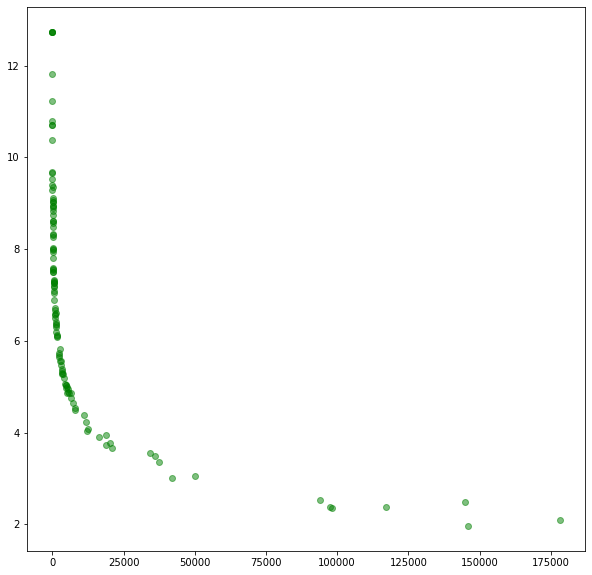

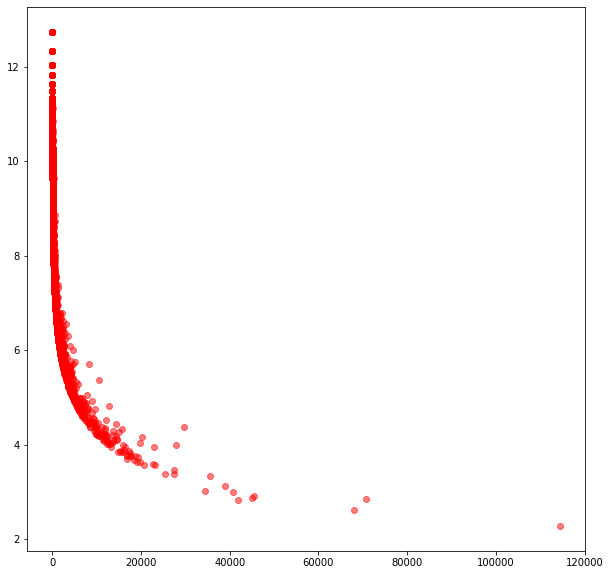

In [17]:
def run_analysis(root_dir, output_file_name, language, color):
    
    df_all_descriptions = get_all_descriptions_from_folder(root_dir)
    
    check_percentage_empty_rows(df_all_descriptions, language, 'nan')  
    
    df_all_descriptions_nan_removed = remove_nans_for_language(df_all_descriptions, language, 'nan')
    
    Plot_top_n_words(df_all_descriptions_nan_removed, language, 25)    
    
    df_word_counts = create_df_word_counts(language, df_all_descriptions_nan_removed)
    
    add_in_nltk_bool(df_word_counts, language)
    
    df_word_counts = add_idf_scores(df_word_counts, df_all_descriptions_nan_removed, language)
    
    output_plots(df_word_counts)
    
    df_word_counts = calc_row_count_each_word(df_word_counts, df_all_descriptions_nan_removed, language)  
        
    df_true, df_false = plot_idf_count_comparisons(df_word_counts, 'red') 
        
    save_df(df_word_counts, output_file_name)
    
run_analysis(r'C:\Users\Shaheen.Ahmed\Documents\SOE_corpus_work\Descriptions', 
            r'C:\Users\Shaheen.Ahmed\Documents\SOE_corpus_work\df_word_counts_english.csv',
            'English',
            'Black') 

# Reload in results, if saved previously


In [ ]:
def experiment_with_threshold(input_file, threshold_true, threshold_false):

    df = pd.read_csv(input_file, index_col = 0, encoding = 'utf-8')
    
    df_true = df[df['in_nltk_stopwords_bool'] == True]
    df_false = df[df['in_nltk_stopwords_bool'] == False]
    
    list_stopwords_df_true = df_true[df_true['idf'] <= threshold_true].word.unique()
    list_stopwords_df_false = df_false[df_false['idf'] <= threshold_false].word.unique()
    
    print ("Number of stopwords in nltk found = %s" % (len(list_stopwords_df_true)))
    print (list_stopwords_df_true)

    print ("Number of stopwords not in nltk found = %s" % (len(list_stopwords_df_false)))
    print (list_stopwords_df_false)
    
    
experiment_with_threshold(r'C:\Users\Shaheen.Ahmed\Documents\SOE_corpus_work\df_word_counts_idf_merged.csv', 0.01, 0.0001)
